In [ ]:
#It is observed early on that the number of excellent and poor wines may be treated as outlier values since they are 
#scarcely present in the dataset. 

#However, as shown later, the IsolationForest algorithm fails at distinguishing the 'outlier' wines given all the 
#important features

In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


df = pd.read_csv("~/Desktop/winequalityN.csv")
df.head()



,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
df.isnull().any()

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [72]:
df['type'] = df['type'].apply(lambda x: 1 if x=='white' else 0)

In [73]:
df= df.fillna(df.mean())

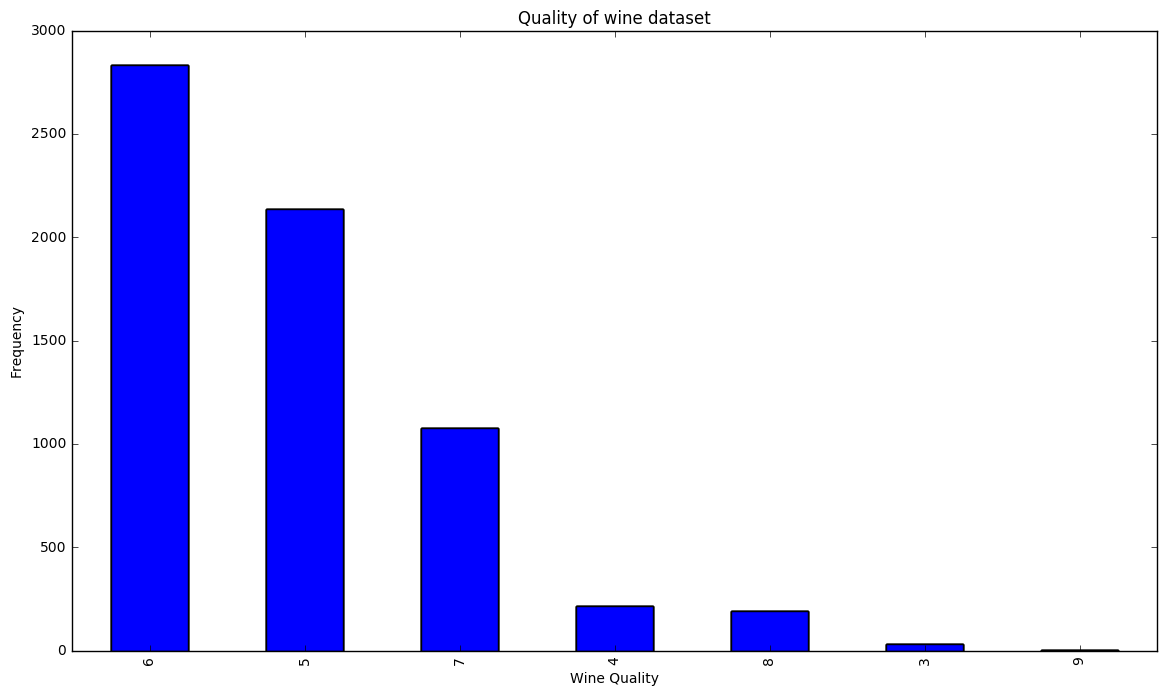

In [75]:
ax = df['quality'].value_counts().plot(kind='bar',figsize=(14,8),
                                    title="Quality of wine dataset")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Frequency")
plt.show()

In [ ]:
#The count of high qualty wies and low quality wines lies in the outlier range and will have to be dealt with separately

In [76]:
correlation_matrix  = df.corr()
correlation_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085699
free sulfur dioxide     0.055463
sulphates               0.038713
pH                      0.019356
residual sugar         -0.036819
total sulfur dioxide   -0.041385
fixed acidity          -0.076967
chlorides              -0.200818
volatile acidity       -0.265838
density                -0.305858
Name: quality, dtype: float64

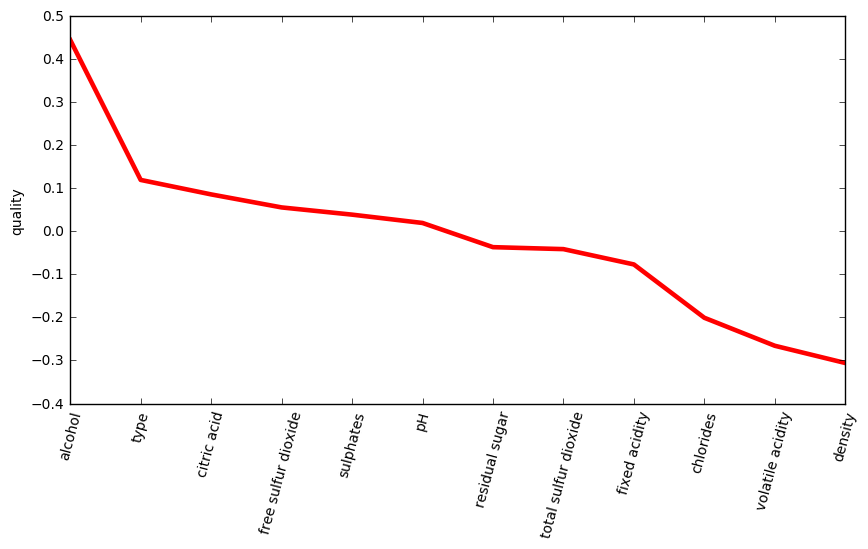

In [83]:
columns = [           
'alcohol'     ,            
'type'       ,           
'citric acid'  ,          
'free sulfur dioxide'         ,         
'sulphates'   ,        
'pH'         ,       
'residual sugar'            ,      
'total sulfur dioxide'               ,     
'fixed acidity'               ,    
'chlorides'      ,   
'volatile acidity'         ,  
'density'    ]

correlations = [ df['quality'].corr(df[f]) for f in columns ]


def plot_dataframe(df, y_label):  
    color='red'
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); 
    plt.show()
    
df1 = pd.DataFrame({'attributes': columns, 'correlation': correlations})

plot_dataframe(df1, 'quality')
plt.xkcd()

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split


In [86]:
target_variable='quality'
# Standardizing all properties which may affect the presumed target 

scaler = MinMaxScaler()
zdf = pd.DataFrame(scaler.fit_transform(df[columns]))
zdf.columns = columns
zdf[target_variable] = df[target_variable]

/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [87]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(zdf[columns], zdf[target_variable], test_size=0.2, random_state=SEED)

clf=RandomForestClassifier(random_state=SEED,n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

/home/rithvik/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/rithvik/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


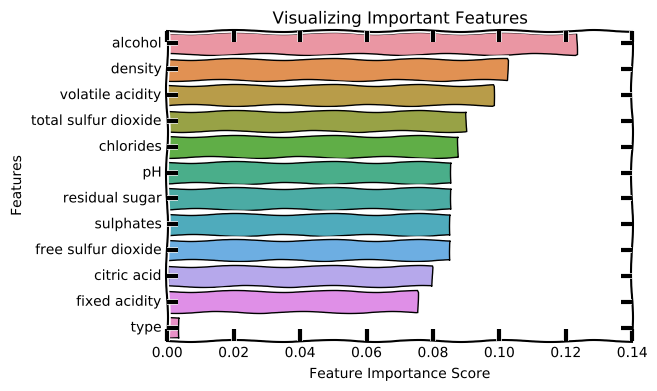

In [88]:
feature_imp = pd.Series(clf.feature_importances_,index=columns).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [89]:
#almost all features are equally important except type
impfeatures = [          
'alcohol'     ,                       
'citric acid'  ,          
'free sulfur dioxide'         ,         
'sulphates'   ,        
'pH'         ,       
'residual sugar'            ,      
'total sulfur dioxide'               ,     
'fixed acidity'               ,    
'chlorides'      ,   
'volatile acidity'         ,  
'density'    ]

In [174]:
#Excellent ie 8,9 & poor wines ie 3,4 have been excluded
#these 'outliers' will be tested using IsolationForest algorithm
zdf1 = zdf.loc[df['quality'].isin([5 ,6, 7])].drop(['type'], axis =1)

In [201]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(zdf1[impfeatures], zdf1[target_variable], test_size=0.2, random_state=SEED)

clf=RandomForestClassifier(random_state=SEED,n_estimators=100)
#clf=LogisticRegression(random_state=SEED)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


clf2 = linear_model.SGDRegressor()
clf2.fit(X_train, y_train)
# clf is a trained model
y_predicted = clf2.predict(X_test)




print("Accuracy: of RFClassifier",metrics.accuracy_score(y_test, y_pred))
print("R2_score of SGDRegessor", metrics.r2_score(y_test, y_predicted))

X_outliers = zdf.loc[df['quality'].isin([8, 9])].drop(['quality','type'], axis =1)
#y_outliers = zdf['quality'].loc[df['quality'].isin([8, 9])]

Accuracy: of RFClassifier 0.7184145334434352
R2_score of SGDRegessor 0.1868589884196713


/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [188]:
from sklearn.ensemble import IsolationForest

# Isolation Forest ----

# training the model
clf1 = IsolationForest(max_samples=100, random_state= SEED, contamination=0.03)
clf1.fit(X_train)

# predictions
y_pred_train = clf1.predict(X_train)
y_pred_test = clf1.predict(X_test)
y_pred_outliers = clf1.predict(X_outliers)

/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/rithvik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [189]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])


# outliers ----
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])


Accuracy: 0.9686209744013212
Accuracy: 0.025252525252525252


In [195]:
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1])